In [97]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from random import sample
import os

In [98]:
cur_dir = os.getcwd()
train_file_path = os.path.join(cur_dir, 'ann-train.data')
test_file_path = os.path.join(cur_dir, 'ann-test.data')
feature_file_path = os.path.join(cur_dir, 'ann-thyroid.cost')

In [99]:
# Organize features

features = pd.read_csv(feature_file_path, sep =":", header =None)
features = features[features.columns[:1]]
features = features.append(pd.Series("mixed"),ignore_index= True)
features_list = np.squeeze(features.to_numpy())
features = features.to_dict()[0]


In [100]:
# Prepare tranining data 
data_train = pd.read_csv(train_file_path, sep =" ", header =None)
train_data= data_train[data_train.columns[0:21]]
train_data = train_data.rename(columns=features,inplace =False)
label_train = data_train[data_train.columns[21]].astype("category")

In [101]:
# Prepare test data

data_test = pd.read_csv(test_file_path, sep =" ", header =None)
test_data= data_test[data_test.columns[0:21]]
test_data = test_data.rename(columns=features,inplace =False)
label_test=data_test[data_train.columns[21]].astype("category")


In [108]:
# Create Decision Tree Classifier


def createTree(data,label, criterion="gini",splitter="best",random_state =3, max_depth=15,inpurity=0):
    decision_tree=DecisionTreeClassifier(criterion= criterion, splitter=splitter, random_state=random_state, max_depth=max_depth,min_impurity_decrease=inpurity)
    decision_tree = decision_tree.fit(data,label)
  
    fig, ax = plt.subplots(figsize=(20,20))
    tree.plot_tree(decision_tree,filled= True,feature_names= features_list)
    plt.show()
    return decision_tree 



def classificationAccuracy(model, data,label, mode = "Training"):
    

    label= label.astype(int)
    preds=model.predict(data).astype(int)
    #print(preds.shape)
    pred_accuracy = accuracy_score(preds,label)
    
    print( mode, "  accuracy is : ", 100*pred_accuracy)
    
    #class based accuracy
    class_labels = np.sort(label.unique())
    class_accuracy = []
    
    for cl in class_labels: 
        class_pred= model.predict(data.iloc[label.index[label==cl]]).astype(int)
        class_acc= accuracy_score(class_pred, label.iloc[label.index[label==cl]])
        print(mode, " accuracy for class ", cl, "is : ", class_acc*100 )
        class_accuracy.append(class_acc)                   
                                            
            
            
    # Confusion Matrix Creation
    
    plot_confusion_matrix(model, data, label)  
    plt.title("Confusion Matrix in " +  mode)
    plt.show()
    
    

# Desicion Tree without Pruning

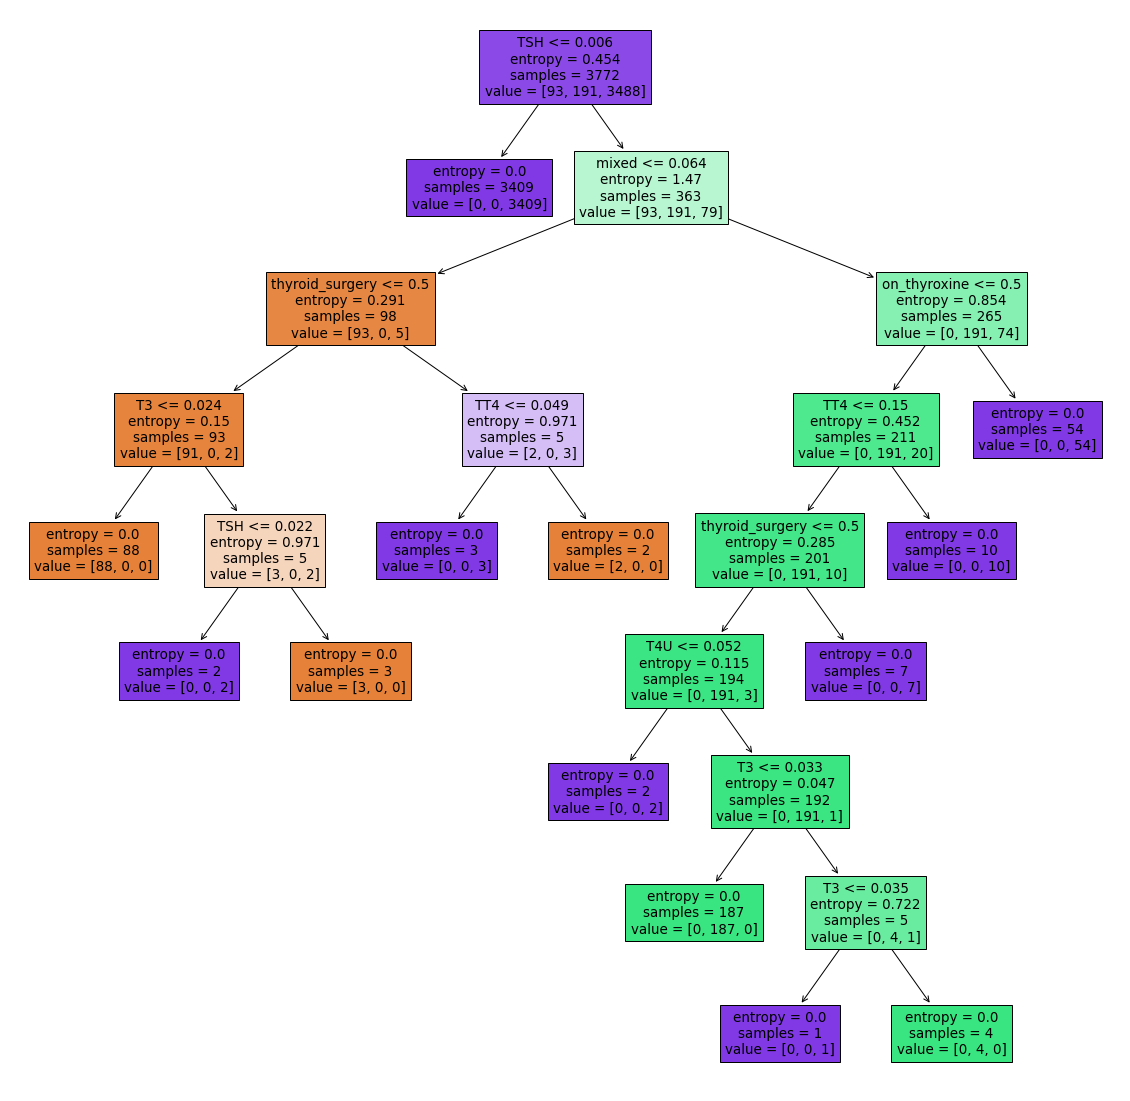

Training   accuracy is :  100.0
Training  accuracy for class  1 is :  100.0
Training  accuracy for class  2 is :  100.0
Training  accuracy for class  3 is :  100.0


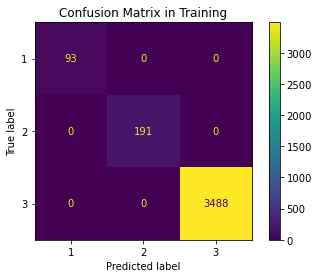

Test   accuracy is :  99.27071178529755
Test  accuracy for class  1 is :  94.52054794520548
Test  accuracy for class  2 is :  98.87005649717514
Test  accuracy for class  3 is :  99.40213971050976


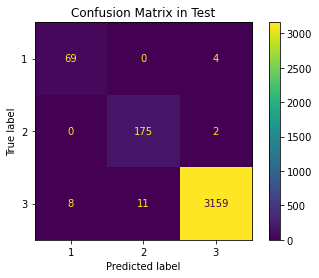

In [109]:
# Without pruning
decision_tree= createTree(train_data,label_train,"entropy","best",12,8,0.0)
classificationAccuracy(decision_tree,train_data,label_train,"Training")
classificationAccuracy(decision_tree,test_data,label_test,"Test")

# Decision Tree with Pruning

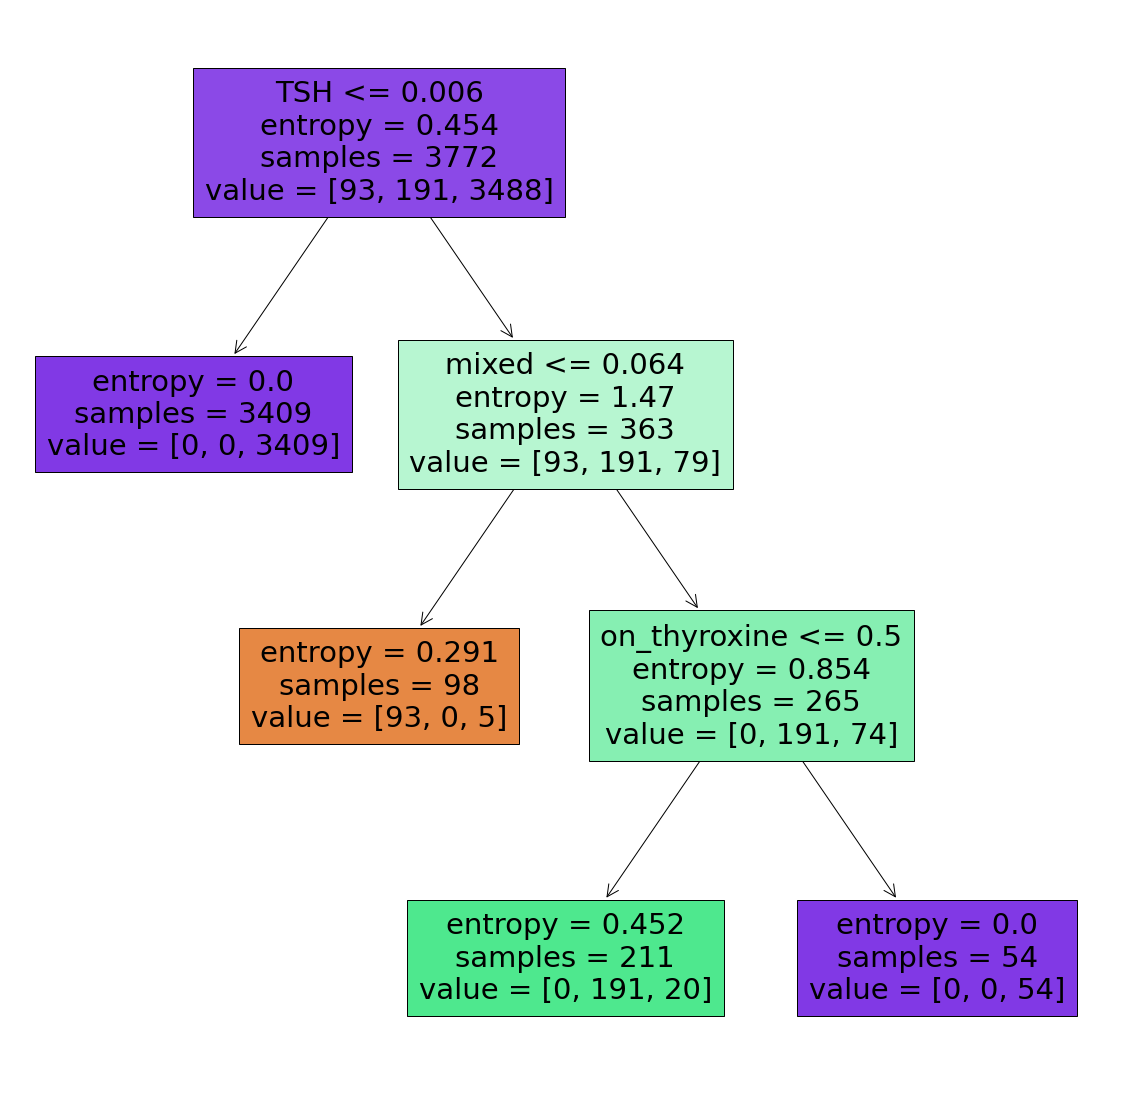

Training   accuracy is :  99.33722163308589
Training  accuracy for class  1 is :  100.0
Training  accuracy for class  2 is :  100.0
Training  accuracy for class  3 is :  99.28325688073394


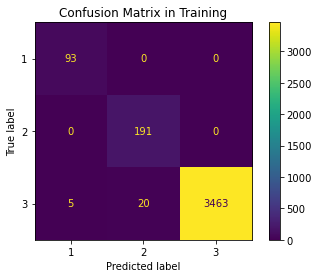

Test   accuracy is :  98.80396732788797
Test  accuracy for class  1 is :  100.0
Test  accuracy for class  2 is :  100.0
Test  accuracy for class  3 is :  98.7098804279421


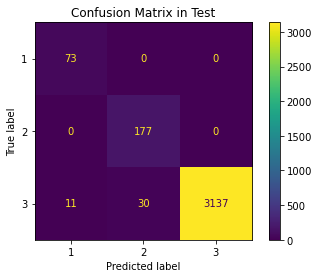

In [110]:
# With pruning
decision_tree= createTree(train_data,label_train,"entropy","best",12,8,0.025)
classificationAccuracy(decision_tree,train_data,label_train,"Training")
classificationAccuracy(decision_tree,test_data,label_test,"Test")

# Normalized Decision Tree

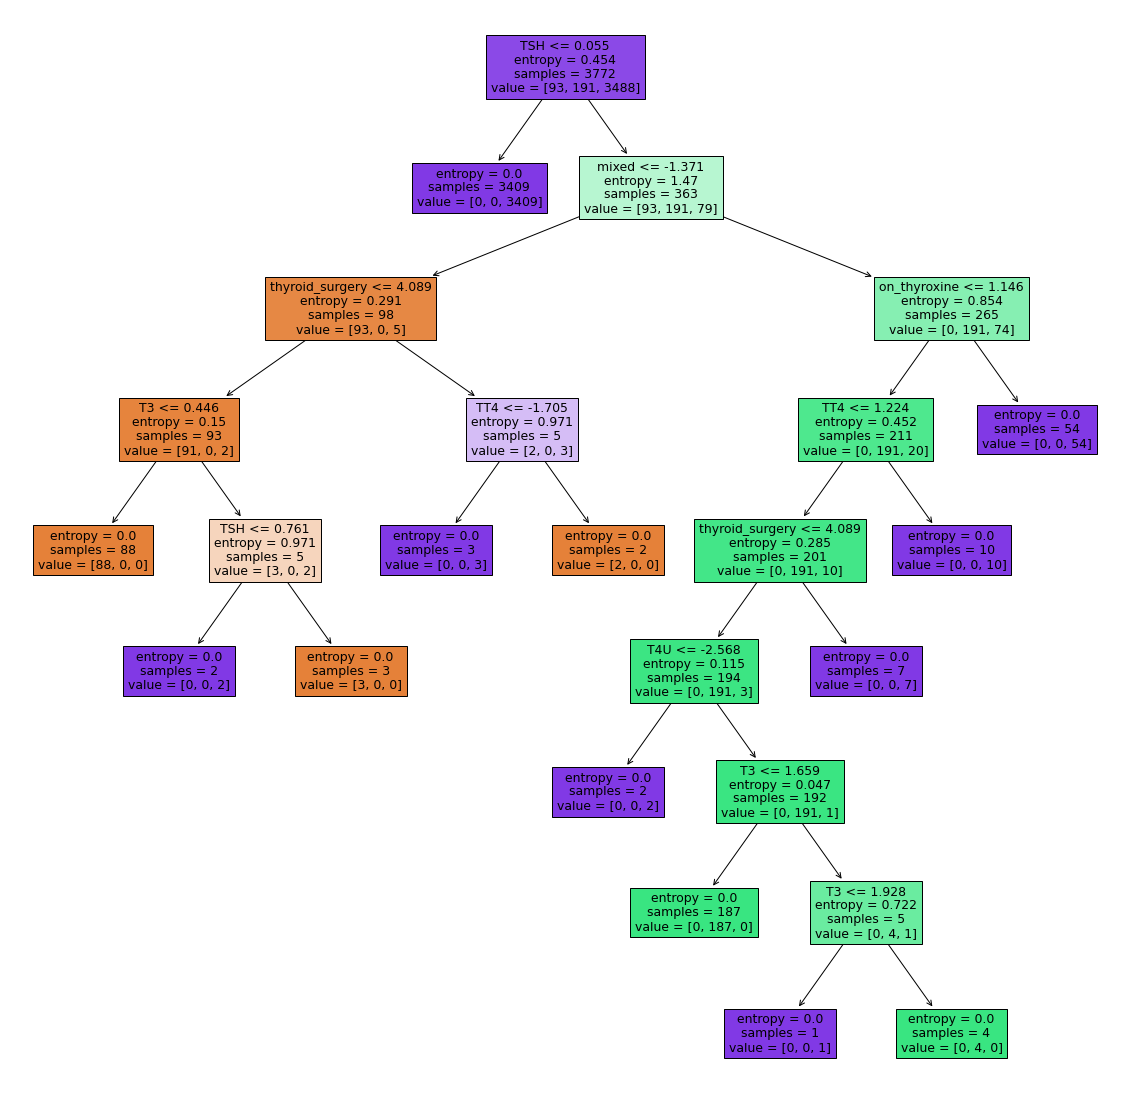

Training   accuracy is :  100.0
Training  accuracy for class  1 is :  100.0
Training  accuracy for class  2 is :  100.0
Training  accuracy for class  3 is :  100.0


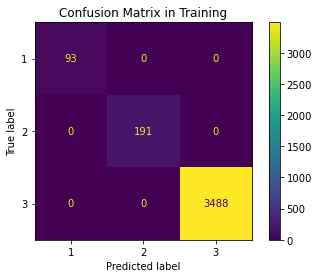

Test   accuracy is :  98.83313885647608
Test  accuracy for class  1 is :  91.78082191780823
Test  accuracy for class  2 is :  93.22033898305084
Test  accuracy for class  3 is :  99.30774071743235


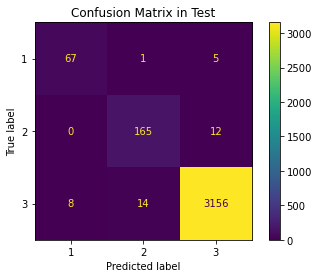

In [111]:
# Normalized 
scaler = StandardScaler()
train_norm = scaler.fit_transform(train_data)
train_norm= pd.DataFrame(train_norm)
test_norm = scaler.fit_transform(test_data)
test_norm= pd.DataFrame(test_norm)


decision_tree= createTree(train_norm,label_train,"entropy","best",5,10,0)
classificationAccuracy(decision_tree,train_norm,label_train,"Training")
classificationAccuracy(decision_tree,test_norm,label_test,"Test")



In [106]:
# Balanced Classes

def balanceData(data,label):
    
    
    min_class = label.value_counts().min()
    numClass = len(label.value_counts())
    class_labels = np.sort(label.unique())
    balanced = pd.DataFrame(columns=features_list)
    balanced_label = np.repeat(np.array([[1],[2],[3]]),min_class)
    balanced_label= pd.Series(balanced_label)

    

    for cl in class_labels:
        perm = sample(list(label.index[label==cl]),min_class)
        d=data.iloc[perm]
        balanced= balanced.append(d,ignore_index=True)
       
    return balanced,balanced_label



 # Balanced Model Decision Tree

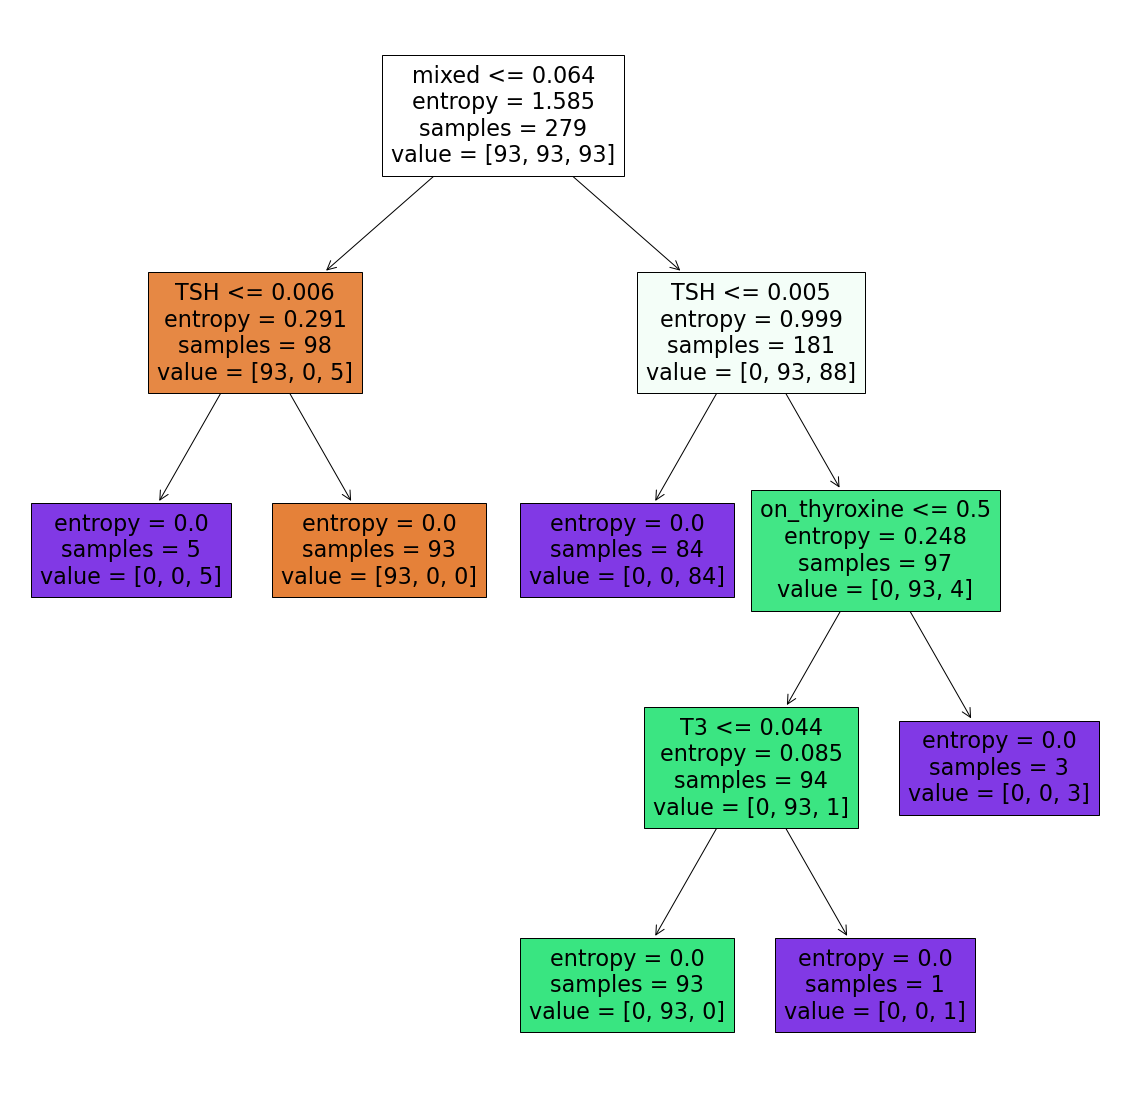

Training   accuracy is :  100.0
Training  accuracy for class  1 is :  100.0
Training  accuracy for class  2 is :  100.0
Training  accuracy for class  3 is :  100.0


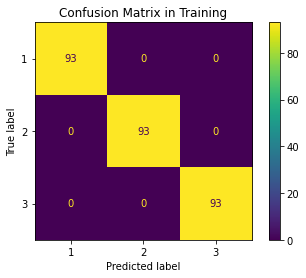

Test   accuracy is :  97.87047841306884
Test  accuracy for class  1 is :  100.0
Test  accuracy for class  2 is :  100.0
Test  accuracy for class  3 is :  97.70295783511642


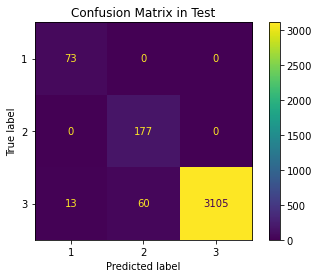

In [112]:
train_data_bal,label_bal= balanceData(train_data,label_train)
decision_tree= createTree(train_data_bal,label_bal,"entropy","best",12,8,0)
classificationAccuracy(decision_tree,train_data_bal,label_bal,"Training")
classificationAccuracy(decision_tree,test_data,label_test,"Test")

End